### Pemahaman permasalahan

User: employees at financial companies

Permasalahan:
1. Bagaimana user dapat memprediksi apakah seseorang memiliki tanggungan pembayaran yang masih belum dibayar (default payment) atau tidak beradasarkan beberapa variabel demografi. Hal ini bertujuaaan agar user dapat mempersiapkan tindakan selanjutnya untuk menangani pelanggan yang apabila terdapat permasalahan pada pembayarannya.
2. Apa saja lima variabel terpenting dalam memprediksi hal tersebut. Hal ini perlu dilakukan agar saat mendapatkan dataset tahun berikutnya, variabel terpenting tersebut harus ada untuk mendukung kinerja pemodelan

### Mengimport data

Data dapat di download melalui https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\My Computer\Downloads\Compressed\UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
# Menampilkan ukuran data
data.shape

(30000, 25)

### Insight dasar dari Dataset

In [3]:
# Mengecek tipe data
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [4]:
# melihat deskripsi data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# mengecek data yang kosong
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

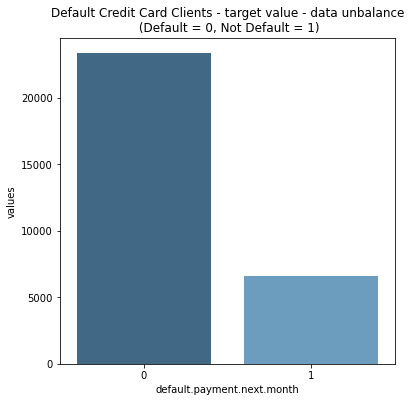

In [6]:
# mengecek ketidak seimbangan data yang berhubungan dengan nilai target
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

temp = data["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("bright")
sns.barplot(x = 'default.payment.next.month', y="values", data=df, palette="Blues_d")
locs, labels = plt.xticks()
plt.show()

In [58]:
df['percentage']=df['values']/30000*100
df

,default.payment.next.month,values,percentage
0,0,23364,77.88
1,1,6636,22.12


Sebanyak 6.636 dari 30.000 (atau 22,12%) klien akan membayar bulan depan.

### Eksplorasi data

##### Jumlah batas kredit

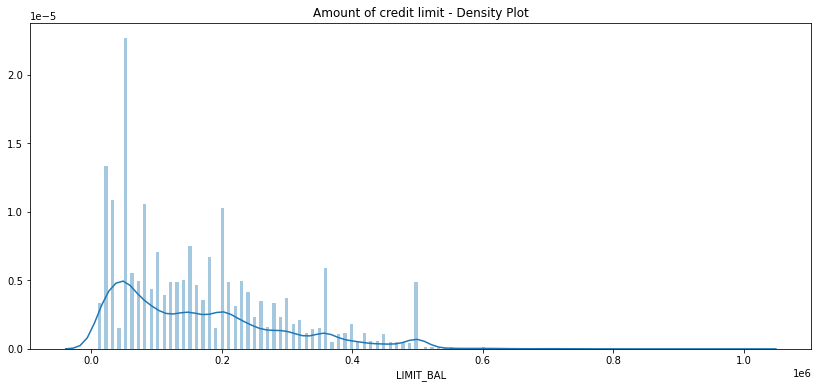

In [7]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['LIMIT_BAL'],kde=True,bins=200)
plt.show()

In [8]:
# Menampilkan 5 kelompok terbesar
data['LIMIT_BAL'].value_counts().head()

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Jumlah kartu kredit terbesar adalah dengan limit 50.000 (3365), diikuti 20.000 (1976) dan 30.000 (1610)

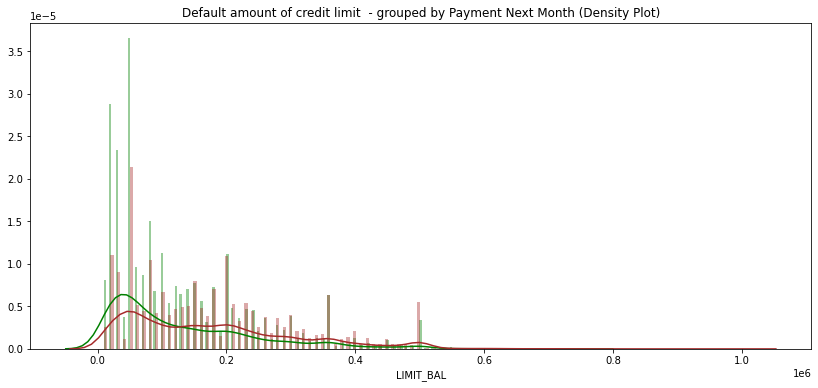

In [9]:
# Jumlah limit kredit yang dikelompokkan berdasarkan pembayaran default bulan depan
class_0 = data.loc[data['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data.loc[data['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="green")
sns.distplot(class_0,kde=True,bins=200, color="brown")
plt.show()

Sebagian besar default adalah untuk batas kredit 0-100.000 (dan density untuk interval ini lebih besar untuk default daripada non-default). Jumlah default yang lebih besar adalah untuk jumlah 50.000, 20.000, dan 30.000.

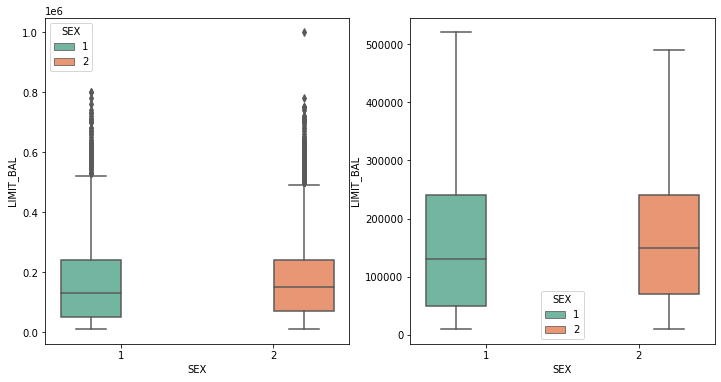

In [10]:
# membandingkan Limit_Bal dan Sex ; 1 = laki", 2 = Perempuan

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
# outlier ditampilkan
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data, palette="Set2",showfliers=True)
# fokus pada box plot tanpa outlier
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data, palette="Set2",showfliers=False)
plt.show();

Jumlah kredit batas cukup seimbang antara jenis kelamin. Laki-laki memiliki Q1 dan Q2 yang sedikit lebih kecil dan Q3 yang lebih besar. Perempuan memiliki nilai outlier yang lebih besar (1 juta dolar NT).

### Fitur Korelasi

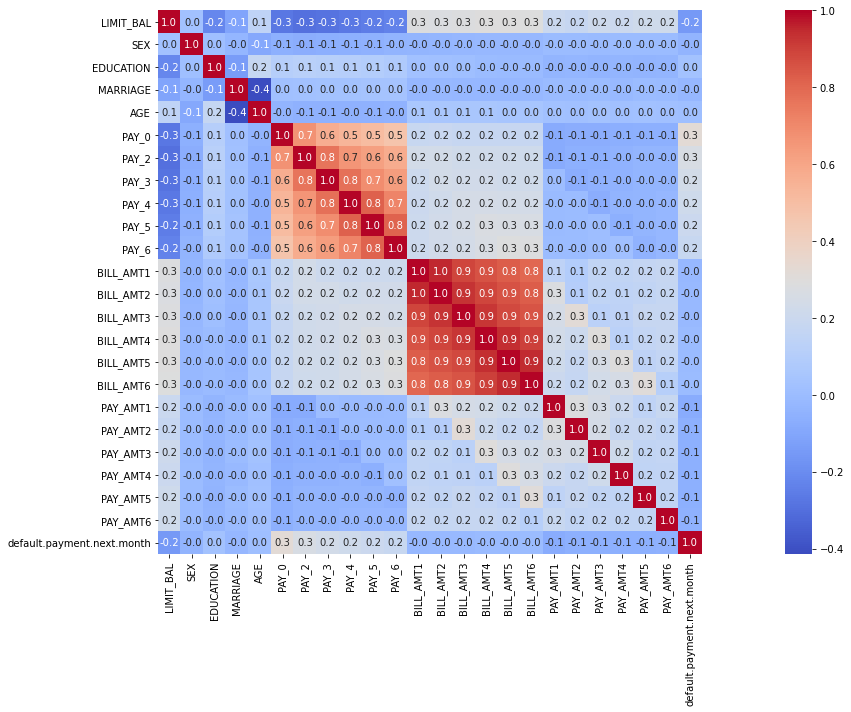

In [11]:
# menampilkan korelasi
data_corr = data.drop(['ID'], axis=1)
corr = data_corr.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f", cmap="coolwarm")  

Korelasi dari Amount of bill statement di April - September 2005 ('BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'):
1. Korelasi semakin menurun dengan jarak antar bulan. Korelasi terendah antara Sept-April

Korelasi dari Amount of previous payment di April - September 2005 ('PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'):
1. Korelasi semakin menurun dengan jarak antar bulan. Korelasi terendah antara Sept-April.

Korelasi antara Repayment status di April - September 2005 ('PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'):
1. Korelasi semakin menurun dengan jarak antar bulan. Korelasi terendah antara Sept-April

### Fitur distribusi

Status menikah:
0 : unknown (let's consider as others as well)
1 : married
2 : single
3 : others

Jenis kelamin:
1 : male
2 : female

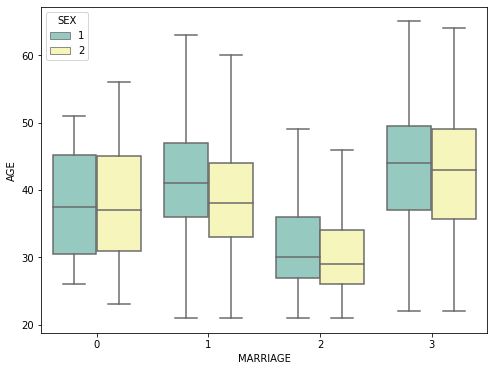

In [12]:
# mendefinisikan suatu fungsi untuk menampilkan boxplot
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data, palette="Set3",showfliers=False)
    s.set_xticklabels(s.get_xticklabels())
    plt.show();

# boxplot untuk variabel 'MARRIAGE','AGE', dan 'SEX'
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Status pendidikan:

1 : graduate school
2 : university
3 : high school
4 : others
5 : unknown
6 : unknow

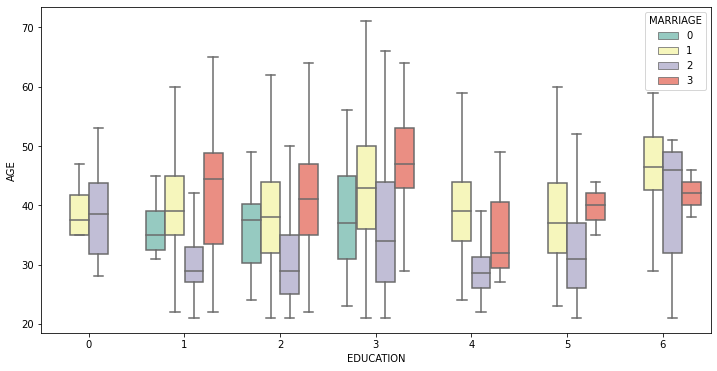

In [13]:
# boxplot untuk variabel 'EDUCATION','AGE', dan 'MARRIAGE'
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

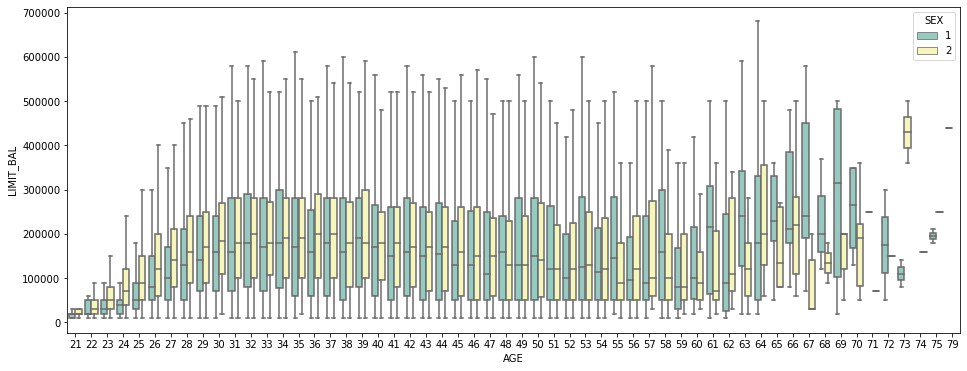

In [14]:
# boxplot dengan distribusi batas jumlah kredit yang dikelompokkan berdasarkan usia dan jenis kelamin.
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

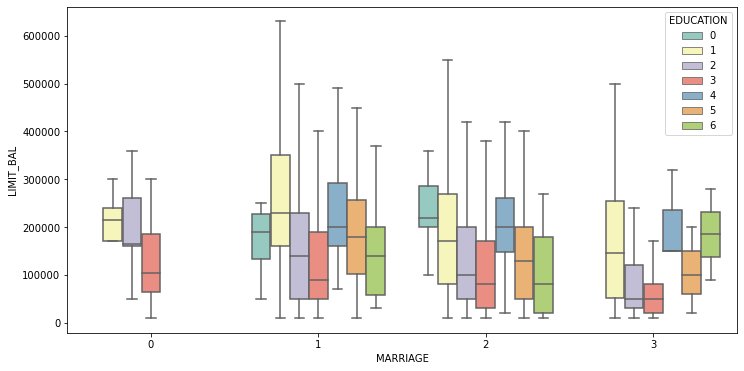

In [15]:
# boxplot dengan distribusi batas jumlah kredit yang dikelompokkan menurut status pernikahan dan tingkat pendidikan.
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### Model prediktif

In [16]:
# membagi data training dan data test
data_model = data_corr.drop(['default.payment.next.month'], axis=1)
X = data_model.values
y = data['default.payment.next.month']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# melakukan standarisasi
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )

# menyiapkan metriks untuk mengevaluasi model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

##### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit( X_train, y_train )
y_pred_1 = random_forest.predict( X_test )

cm = confusion_matrix( y_test, y_pred_1 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( random_forest, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for RandomForest = 0.80
Mean RandomForest CrossVal Accuracy on Train Set 0.81, with std=0.01


In [18]:
#Penilaian ROC AUC SCORE MODEL RANDOM FOREST CLASSIFIER
y_train_RF = random_forest.predict(X_train)
roc_auc_score(y_train,y_train_RF)

0.9580699367428086

##### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit( X_train, y_train )
y_pred_2 = logreg.predict( X_test )

cm = confusion_matrix( y_test, y_pred_2 )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( logreg, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

Accuracy on Test Set for LogReg = 0.81
Mean LogReg CrossVal Accuracy on Train Set 0.81, with std=0.00


In [20]:
#Penilaian ROC AUC SCORE MODEL LOGISTIC REGRESI
y_train_pred_LS = logreg.predict(X_train)
roc_auc_score(y_train,y_train_pred_LS)

0.6117417770277147

##### K-Neighbours

Sebelum menuju ke model, perlu menentuhan hyperparameter terbaik menggunakan GridSearchCV

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import numpy as np

model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(5,25), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [22]:
gscv.best_params_

{'n_neighbors': 23, 'weights': 'uniform'}

In [23]:
knn = KNeighborsClassifier(n_neighbors=23, weights= 'uniform')
knn.fit( X_train, y_train )
y_pred_3 = knn.predict( X_test )
cm = confusion_matrix( y_test, y_pred_3 )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( knn, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.81
Mean KN CrossVal Accuracy on Train Set Set 0.81, with std=0.00


In [24]:
#Penilaian ROC AUC SCORE MODEL KNN
y_train_KNN = knn.predict(X_train)
roc_auc_score(y_train,y_train_KNN)

0.6536316809579026

Berdasarkan pemaparan tersebut diperoleh:
1. Semua model yang digunakan sudah fit dilihat dari nilai akurasi test set dan akurasi train set
2. Nilai AUC model random forest sebesar 0.9580699367428086
3. Nilai AUC model Logistic Regression sebesar 0.9580699367428086
4. Nilai AUC model K-Neighbours sebesar 0.6536316809579026
5. Jadi, model yang bisa kita pakai menggunakan model dengan nilai AUC yang tinggi, yaitu model random forest

In [45]:
# Menampilkan hasil prediksi model random forest
pd.DataFrame(y_pred_1, columns=['default.payment.next.month'])

,default.payment.next.month
0,0
1,1
2,0
3,0
4,1
...,...
5995,0
5996,0
5997,0
5998,0


In [49]:
data_model.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

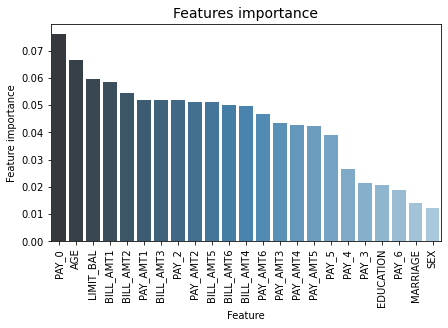

In [57]:
# Menampilkan fitur penting model random forest
feature_importance = pd.DataFrame({'Feature': data_model.columns, 'Feature importance': random_forest.feature_importances_})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Jadi lima fitur paling penting model tersebut meliputi PAY_0, AGE, LIMIT_BAL, BIL_AMT1, dan BIL_AMT2